In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import plotly.io as pio 
pio.renderers.default = "svg"

In [2]:
raw_df=pd.read_csv('Zomato_Chennai_Dataset.csv')

In [3]:
raw_df

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...,...,...
12027,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Porur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12028,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Kolathur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12029,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Anna Nagar East,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12030,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Ramapuram,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"


In [4]:
raw_df.shape

(12032, 12)

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          6681 non-null   float64
 8   Dining Rating Count    11812 non-null  object 
 9   Delivery Rating        6181 non-null   float64
 10  Delivery Rating Count  11812 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


In [6]:
raw_df.describe()

,Price for 2,Dining Rating,Delivery Rating
count,12032.000000,6681.000000,6181.000000
mean,397.611370,3.387756,3.805290
std,332.045938,0.558181,0.374213
min,40.000000,0.300000,0.300000
25%,200.000000,3.100000,3.600000
50%,300.000000,3.500000,3.900000
75%,450.000000,3.800000,4.000000
max,5000.000000,4.900000,4.700000


In [7]:
 # Dropping columns which are not required for further analysis 
 
raw_df.drop(['Zomato URL', 'Address','Delivery Rating Count','Features'], axis = 1, inplace=True) 

In [8]:
raw_df.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1


In [9]:
raw_df.isnull().sum()

Name of Restaurant        0
Location                  0
Cuisine                   0
Top Dishes                0
Price for 2               0
Dining Rating          5351
Dining Rating Count     220
Delivery Rating        5851
dtype: int64

In [10]:
raw_df.fillna(0, inplace=True) 


In [11]:
raw_df.isnull().sum()

Name of Restaurant     0
Location               0
Cuisine                0
Top Dishes             0
Price for 2            0
Dining Rating          0
Dining Rating Count    0
Delivery Rating        0
dtype: int64

In [12]:
 # Finding those restaurant whose has 0 Rating or Votes 
 
useless_data = (raw_df['Dining Rating'] == 0.0)
raw_df[useless_data] 

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating
6,Bai Veetu Kalyanam,Navallur,['Biryani'],"['Bread Halwa', ' Mutton Biryani', ' Brinjal G...",350.0,0.0,Does not offer Dining,4.3
77,Al Dhareeq Beef Biriyani,Kodambakkam,['Biryani'],['Beef Biryani'],300.0,0.0,Does not offer Dining,3.9
106,Twilight Take Out,Nungambakkam,"['North Indian', ' Chinese', ' Rolls', ' Conti...","['Club Sandwich', ' Chicken Tikka Roll', ' Chi...",350.0,0.0,Does not offer Dining,4.0
107,The Red Box,Anna Nagar West,['Chinese'],"['Noodle', ' Chilli Chicken Gravy', ' Dragon C...",200.0,0.0,Does not offer Dining,4.2
114,Charminar Biriyani Centre,Royapettah,"['Biryani', ' North Indian']","['Chicken Biryani', ' Bread Halwa', ' Brinjal ...",300.0,0.0,Does not offer Dining,3.9
...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,['Sandwich'],Invalid,350.0,0.0,0,0.0
12028,CK's Sandwiches,Kolathur,['Sandwich'],Invalid,350.0,0.0,0,0.0
12029,CK's Sandwiches,Anna Nagar East,['Sandwich'],Invalid,350.0,0.0,0,0.0
12030,CK's Sandwiches,Ramapuram,['Sandwich'],Invalid,350.0,0.0,0,0.0


In [13]:
## Performing Negation of the useless dataset and then storing the correct data back in the raw_df DataFrame 
## This permamnently remove the wrong data from the original dataframe 
 
raw_df = raw_df[~useless_data]

In [14]:
raw_df[raw_df.duplicated()] 

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating


In [15]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6681 entries, 0 to 11802
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name of Restaurant   6681 non-null   object 
 1   Location             6681 non-null   object 
 2   Cuisine              6681 non-null   object 
 3   Top Dishes           6681 non-null   object 
 4   Price for 2          6681 non-null   float64
 5   Dining Rating        6681 non-null   float64
 6   Dining Rating Count  6681 non-null   object 
 7   Delivery Rating      6681 non-null   float64
dtypes: float64(3), object(5)
memory usage: 469.8+ KB


Converting the DataTypes of numerical columns to numeric dataype

In [16]:
raw_df['Dining Rating Count'].value_counts() 

Dining Rating Count
4       339
5       271
6       248
8       180
9       168
       ... 
877       1
897       1
872       1
1197      1
224       1
Name: count, Length: 791, dtype: int64

In [17]:
raw_df['Dining Rating Count'] = raw_df['Dining Rating Count'].astype('int64') 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11208\2014812760.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6681 entries, 0 to 11802
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name of Restaurant   6681 non-null   object 
 1   Location             6681 non-null   object 
 2   Cuisine              6681 non-null   object 
 3   Top Dishes           6681 non-null   object 
 4   Price for 2          6681 non-null   float64
 5   Dining Rating        6681 non-null   float64
 6   Dining Rating Count  6681 non-null   int64  
 7   Delivery Rating      6681 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 469.8+ KB


# Cleaning Location column

In [19]:
temp_df = raw_df['Location'].str.split(",",expand = True) 
temp_df

,0,1,2
0,Pallavaram,None,None
1,Alandur,None,None
2,Kodambakkam,None,None
3,Perambur,None,None
4,Perambur,None,None
...,...,...,...
11777,Choolaimedu,None,None
11785,Ambattur,None,None
11794,Karapakkam,None,None
11801,K.K. Nagar,None,None


In [20]:
temp_df[2]=temp_df[2].fillna(temp_df[1])

In [21]:
temp_df[2]=temp_df[2].fillna(temp_df[0])

In [22]:
raw_df['Location']=temp_df[2]

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11208\4043819135.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
raw_df['Location']=raw_df['Location'].str.strip()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11208\3070399654.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Working on Cuisine Type column

In [24]:
raw_df.loc[raw_df['Cuisine'].str.contains('Mithai'),'Cuisine_Type']='Confectionery'
raw_df.loc[raw_df['Cuisine'].str.contains('Fast Food'),'Cuisine_Type']='Food Truck'
raw_df.loc[raw_df['Cuisine'].str.contains('Ice Cream|Beverages'),'Cuisine_Type']='Condiments'
raw_df.loc[raw_df['Cuisine'].str.contains('Pizza|Italian|Wraps'),'Cuisine_Type']='Italian'
raw_df.loc[raw_df['Cuisine'].str.contains('Chinese'),'Cuisine_Type']='Chinese'
raw_df.loc[raw_df['Cuisine'].str.contains('North Indian|South Indian|Biryani|Tamil'),'Cuisine_Type']='Fine Dining'
raw_df.loc[raw_df['Cuisine'].str.contains('Cafe|Coffee'),'Cuisine_Type']='Cafe'
raw_df.loc[raw_df['Cuisine'].str.contains('American|Continental'),'Cuisine_Type']='Continental'
raw_df.loc[raw_df['Cuisine'].str.contains('Bakery'),'Cuisine_Type']='Bakery'
raw_df.loc[raw_df['Cuisine'].str.contains('Andhra'),'Cuisine_Type']='Andhra Cuisine'
raw_df.loc[raw_df['Cuisine'].str.contains('Burger|Rolls'),'Cuisine_Type']='Fast Food'
raw_df.loc[raw_df['Cuisine'].str.contains('Thai'),'Cuisine_Type']='Thai Food'
raw_df.loc[raw_df['Cuisine'].str.contains('Seafood'),'Cuisine_Type']='Sea Food'
raw_df['Cuisine_Type']=raw_df['Cuisine_Type'].fillna('Others')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11208\2957023193.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11208\2957023193.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
raw_df.loc[raw_df['Dining Rating']>=4.5,'Rating Type']='Excellent'
raw_df.loc[(raw_df['Dining Rating']>=4) & (raw_df['Dining Rating']<4.5),'Rating Type']='Very Good'
raw_df.loc[(raw_df['Dining Rating']<4) & (raw_df['Dining Rating']>=3.5),'Rating Type']='Good'
raw_df.loc[(raw_df['Dining Rating']<3.5) & (raw_df['Dining Rating']>=3),'Rating Type']='Average'
raw_df.loc[(raw_df['Dining Rating']<3) & (raw_df['Dining Rating']>=2.5),'Rating Type']='Poor'
raw_df.loc[raw_df['Dining Rating']<2.5,'Rating Type']='Very Poor'


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11208\847004468.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# 4. Copying the cleaned data into a new DataFrame

In [26]:
zomato_df = raw_df.copy() 

In [27]:
zomato_df

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Cuisine_Type,Rating Type
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,Fine Dining,Very Good
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,Fine Dining,Very Good
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,Fine Dining,Very Good
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,Fast Food,Very Good
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,Fine Dining,Very Good
...,...,...,...,...,...,...,...,...,...,...
11777,Kekiz The Cake Shop,Choolaimedu,"['Bakery', ' Desserts']",Invalid,450.0,1.0,0,0.0,Bakery,Very Poor
11785,Engineers Kitchen,Ambattur,"['North Indian', ' Chinese', ' Andhra']",Invalid,400.0,2.5,6,3.5,Andhra Cuisine,Poor
11794,That Juice Shop,Karapakkam,"['Juices', ' Beverages']",Invalid,200.0,3.6,6,4.2,Condiments,Good
11801,Amma Unavagam,K.K. Nagar,['South Indian'],Invalid,150.0,3.3,5,0.0,Fine Dining,Average


# Performing Exploratory Data Analysis

 Q1) How many restaurants are in Chennai for each type of cuisine?

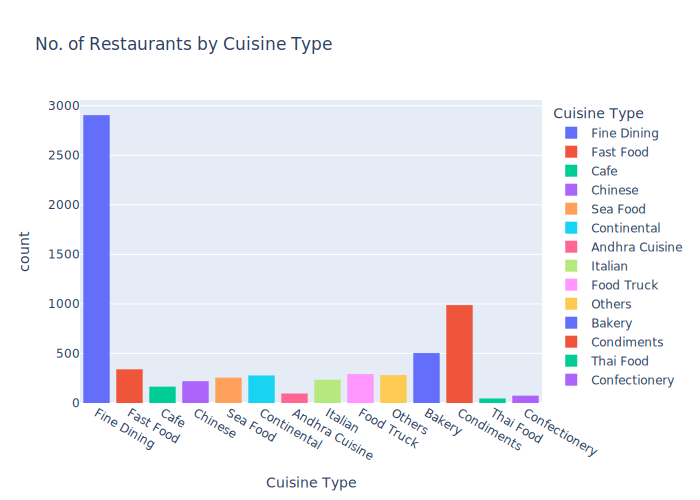

In [28]:
fig = px.histogram(zomato_df, x='Cuisine_Type', color='Cuisine_Type',  
             title= 'No. of Restaurants by Cuisine Type',  
             labels={'Cuisine_Type':'Cuisine Type'}) 
fig.show()

 Q2) What are the percentage of restaurants by Rating Type in Chennai?

In [29]:
rating_type_df = zomato_df['Rating Type'].value_counts().reset_index()
rating_type_df.rename(columns={'count':'COUNT OF RESTAURANTS'}, inplace=True) 
rating_type_df

,Rating Type,COUNT OF RESTAURANTS
0,Good,2501
1,Average,2061
2,Very Good,817
3,Poor,757
4,Very Poor,469
5,Excellent,76


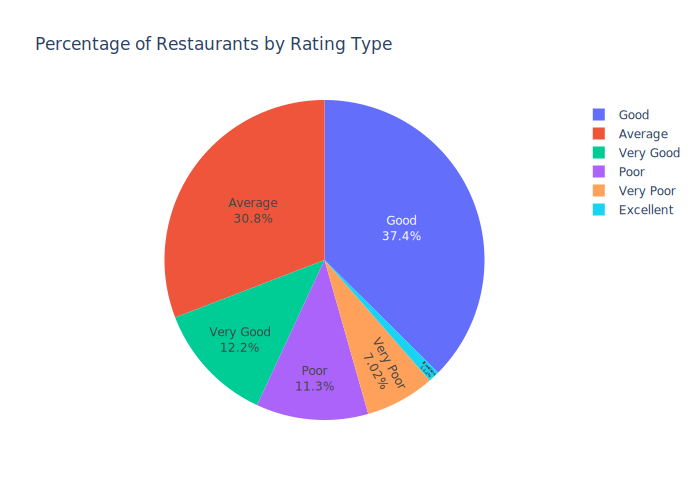

In [30]:
fig = px.pie(rating_type_df, names='Rating Type', values='COUNT OF RESTAURANTS', color='Rating Type',title='Percentage of Restaurants by Rating Type').update_traces(textposition='inside', textinfo='percent+label')
fig.show() 

Q3) Which are the Top 10 highest rated Seafood Restaurant in Chennai?

In [31]:
seafood_df = zomato_df[zomato_df['Cuisine_Type'].str.contains('Sea Food')] 
seafood_df.sort_values(by='Dining Rating',ascending=False).head(10) 

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Cuisine_Type,Rating Type
195,The Marina,Nungambakkam,"['Seafood', ' North Indian', ' Chinese']","['Sea Food', ' Jumbo Prawns', ' Biryani', ' Fi...",1600.0,4.8,1082,4.3,Sea Food,Excellent
292,Alchemy Bar & Lounge,Alwarpet,"['Continental', ' Finger Food', ' Seafood', ' ...","['Cocktails', ' Fries', ' Brownie', ' Peri Per...",2000.0,4.5,432,0.0,Sea Food,Excellent
214,Sera - The Tapas Bar & Restaurant,Gopalapuram,"['Finger Food', ' Seafood', ' Italian', ' Cont...","['Cocktails', ' Pasta', ' Nachos', ' Mashed Po...",1600.0,4.5,964,3.4,Sea Food,Excellent
358,The Wharf 2.0 - Radisson BLU Templebay,Mamallapuram,"['Seafood', ' Mediterranean', ' Italian', ' No...","['Sea Food', ' Jumbo Prawns', ' Pasta', ' Fish...",3000.0,4.4,517,0.0,Sea Food,Very Good
342,L'attitude 49,Grande Bay Resort,"['Singaporean', ' Thai', ' Asian', ' Chinese',...","['Sea Food', ' Fish', ' Pasta', ' Noodle', ' B...",1800.0,4.4,563,0.0,Sea Food,Very Good
315,Layalee,Ekkaduthangal,"['Arabian', ' BBQ', ' Seafood', ' Chinese', ' ...","['Fish', ' Faluda', ' Shawarma', ' Brownie', '...",700.0,4.4,586,4.1,Sea Food,Very Good
282,Bay View - Taj Fisherman's Cove Resort & Spa,Kanchipuram District,"['Seafood', ' South Indian', ' Andhra', ' Kera...","['Sea Food', ' Fish Curry', ' Chips', ' Cockta...",3500.0,4.4,678,0.0,Sea Food,Very Good
96,Urban Spatula,Anna Nagar West,"['Continental', ' Seafood', ' Biryani', ' Ital...","['Burgers', ' Pasta', ' Fish', ' Fries', ' Chi...",800.0,4.4,794,4.3,Sea Food,Very Good
14,Hotel Paramount,Kilpauk,"['North Indian', ' Chinese', ' Seafood', ' Sou...","['Biryani', ' Butter Chicken', ' Tandoori Chic...",500.0,4.3,1266,4.2,Sea Food,Very Good
153,The Bayleaf,Gopalapuram,"['Mughlai', ' North Indian', ' Seafood', ' Bir...","['Rolls', ' Fish', ' Kathi Roll', ' Biryani', ...",800.0,4.3,542,4.0,Sea Food,Very Good


Q4) Which is the best Food Truck in Chennai?

In [32]:
foodtruck_df = zomato_df[zomato_df['Cuisine_Type'] == 'Food Truck'] 
foodtruck_df.sort_values(by='Dining Rating',ascending=False).head(2)

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Cuisine_Type,Rating Type
75,Fusilli Reasons,Kilpauk,['Fast Food'],"['Nachos', ' Iced Tea', ' Garlic Bread', ' Bro...",400.0,4.7,3042,4.4,Food Truck,Excellent
37,Shree Mithai,Chetpet,"['Mithai', ' Street Food', ' Fast Food']","['Chaat', ' Badam Milk', ' Pav Bhaji', ' Panip...",300.0,4.6,1085,4.4,Food Truck,Excellent


Q5) Which places have the highest rated restaurant for each Cuisine Type in Chennai?

In [33]:
 # Assuming restaurants having rating above 4.5 
 
highest_rated_df = zomato_df[zomato_df['Dining Rating'] >= 4.5] 
highest_rated_df 

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Cuisine_Type,Rating Type
15,Welcome Hotel,Purasavakkam,"['South Indian', ' Desserts', ' Beverages']","['Pongal', ' Podi Dosa', ' Idli Sambar', ' Vad...",300.0,4.5,1094,0.0,Fine Dining,Excellent
24,Eating Circles,Alwarpet,['South Indian'],"['Rose Milk', ' Neer Dosa', ' Thatte Idli', ' ...",250.0,4.7,782,4.2,Fine Dining,Excellent
37,Shree Mithai,Chetpet,"['Mithai', ' Street Food', ' Fast Food']","['Chaat', ' Badam Milk', ' Pav Bhaji', ' Panip...",300.0,4.6,1085,4.4,Food Truck,Excellent
50,Andhikkadai,Velachery,['South Indian'],"['Coffee', ' Sweet Kozhukattai', ' Idli', ' Po...",200.0,4.6,908,4.2,Fine Dining,Excellent
57,Brownie Heaven,Royapettah,"['Bakery', ' Desserts', ' Beverages']","['Vanilla Ice Cream', ' Brownie Shake', ' Filt...",350.0,4.9,842,4.3,Bakery,Excellent
...,...,...,...,...,...,...,...,...,...,...
9279,Gastronomer By Double Roti,Teynampet,"['Cafe', ' American', ' Fast Food']","['Burgers', ' Fries', ' Oreo Shake', ' Healthy...",900.0,4.5,2341,4.2,Continental,Excellent
9358,Writer's Cafe,Taramani,"['Cafe', ' American']","['Hot Chocolate', ' Pizza', ' Pasta', ' Waffle...",600.0,4.5,497,4.1,Continental,Excellent
9363,Flower Drum,Adyar,"['Chinese', ' Thai']","['Momos', ' Noodle', ' Dimsum Platter', ' Sche...",800.0,4.5,617,4.3,Thai Food,Excellent
9367,Cream Stone,Thuraipakkam,"['Desserts', ' Ice Cream']","['Death By Chocolate', ' Chocolava', ' Tiramis...",350.0,4.5,683,4.2,Condiments,Excellent


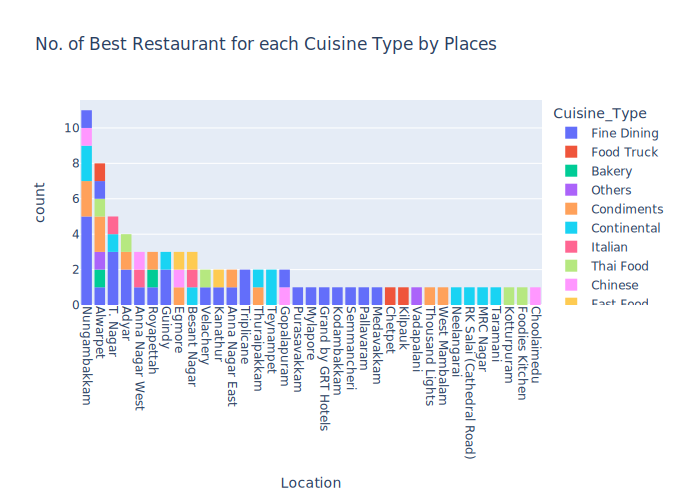

In [34]:
fig = px.histogram(highest_rated_df, x='Location', color='Cuisine_Type',
                   title= 'No. of Best Restaurant for each Cuisine Type by Places').update_xaxes(dtick=1,tickangle=90,categoryorder="total descending")
 
fig.show() 

In [ ]:
Q6) What is the Avg Price Distibution of highest rated restaurant for each Cuisine Type in Chennai?

In [35]:
highest_rated_price_df = highest_rated_df.groupby(by=['Location', 'Cuisine_Type'])['Price for 2'].mean().reset_index() 
highest_rated_price_df.head() 

,Location,Cuisine_Type,Price for 2
0,Adyar,Condiments,200.0
1,Adyar,Fine Dining,1150.0
2,Adyar,Thai Food,800.0
3,Alwarpet,Andhra Cuisine,2500.0
4,Alwarpet,Bakery,1800.0


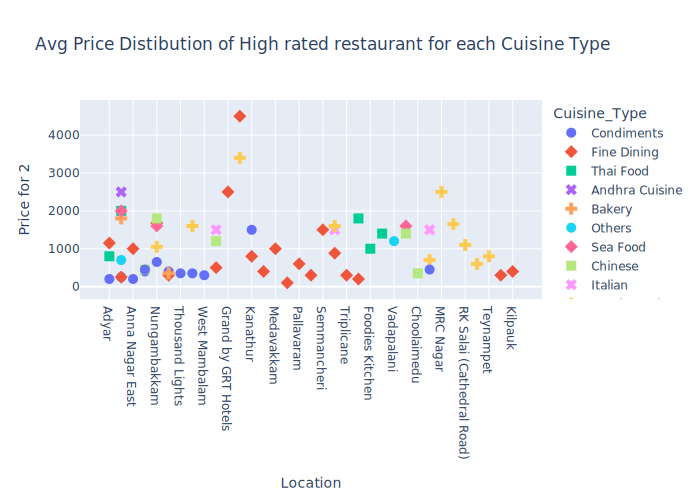

In [37]:
fig = px.scatter(highest_rated_price_df, x="Location", y="Price for 2", color="Cuisine_Type", symbol="Cuisine_Type",  
           title=' Avg Price Distibution of High rated restaurant for each Cuisine Type').update_traces(marker_size=10)
 
fig.show() 


Q7) Which areas have a large number of Chinese Restaurant Market?

In [38]:
chinese_df = zomato_df[zomato_df['Cuisine_Type'].str.contains('Chinese')] 
chinese_df 

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Cuisine_Type,Rating Type
12,Hotel Al Buhari,Vadapalani,"['Chinese', ' Chettinad']","['Shawarma', ' Fried Rice Chicken', ' Biryani']",350.0,4.0,982,3.8,Chinese,Very Good
42,Orange Wok,Nungambakkam,"['Malaysian', ' Asian', ' Chinese']","['Laksa', ' Dragon Chicken', ' Khau Suey', ' M...",1000.0,4.2,774,4.0,Chinese,Very Good
115,North East Kitchen,Egmore,"['Chinese', ' Konkan', ' Momos']","['Momos', ' Noodle', ' Pork Thali', ' Thukpa',...",450.0,4.5,705,4.3,Chinese,Excellent
130,The Chinese Story,Porur,"['Chinese', ' Momos']","['Noodle', ' Momos', ' Chicken Lemon Coriander...",1000.0,4.4,593,4.1,Chinese,Very Good
163,Momo Sa-Khang by Kailash Kitchen,Choolaimedu,"['Momos', ' Chinese']","['Momos', ' Noodle', ' Chowmein', ' Fried Momo...",350.0,4.8,1658,4.5,Chinese,Excellent
...,...,...,...,...,...,...,...,...,...,...
10000,Chop 'N' Stix,Madipakkam,['Chinese'],Invalid,500.0,3.6,24,4.0,Chinese,Good
10557,Chettinese,Thiruvallur,['Chinese'],Invalid,500.0,3.6,35,0.0,Chinese,Good
10558,Chettinese,Ramapuram,['Chinese'],Invalid,500.0,3.5,15,3.7,Chinese,Good
10602,Burma Square - OMR Food Street,Navallur,"['Street Food', ' Chinese']",Invalid,250.0,3.1,11,4.0,Chinese,Average


In [39]:
chinese_rest_df = chinese_df.groupby(by='Location').agg({'Name of Restaurant' : 'count', 'Price for 2' : 'mean'}).rename(columns= {'Name of Restaurant' : 'COUNT OF RESTAURANTS'}).reset_index()
chinese_rest_df = chinese_rest_df.sort_values('COUNT OF RESTAURANTS', ascending=False).head(25) 
chinese_rest_df.head()

,Location,COUNT OF RESTAURANTS,Price for 2
72,Velachery,10,430.000000
42,Nungambakkam,10,960.000000
48,Perungudi,8,406.250000
47,Perambur,7,257.142857
58,Sholinganallur,6,541.666667


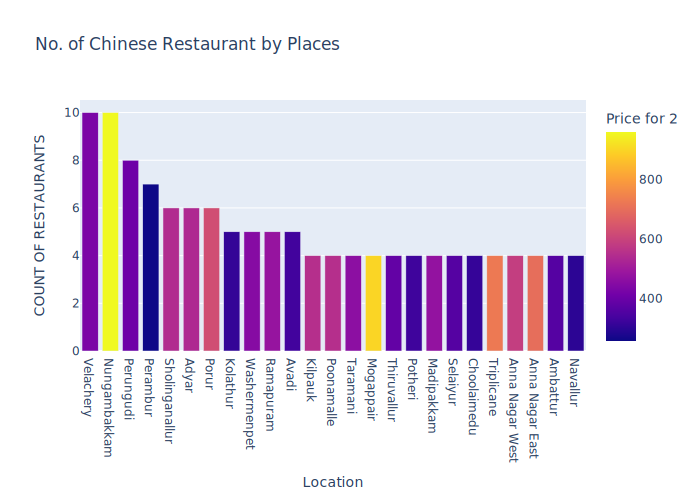

In [40]:
fig = px.bar(chinese_rest_df, x='Location', y='COUNT OF RESTAURANTS', color='Price for 2', title= 'No. of Chinese Restaurant by Places')
 
fig.show() 

Q8) Is there a relation between Price and Rating by each Cuisine Type?

In [41]:
price_rating_df = zomato_df.groupby(['Cuisine_Type', 'Dining Rating'])['Price for 2'].mean().reset_index() 
price_rating_df 

,Cuisine_Type,Dining Rating,Price for 2
0,Andhra Cuisine,2.0,240.0
1,Andhra Cuisine,2.2,300.0
2,Andhra Cuisine,2.4,800.0
3,Andhra Cuisine,2.5,500.0
4,Andhra Cuisine,2.6,400.0
...,...,...,...
344,Thai Food,4.3,1025.0
345,Thai Food,4.4,1000.0
346,Thai Food,4.5,900.0
347,Thai Food,4.6,1800.0


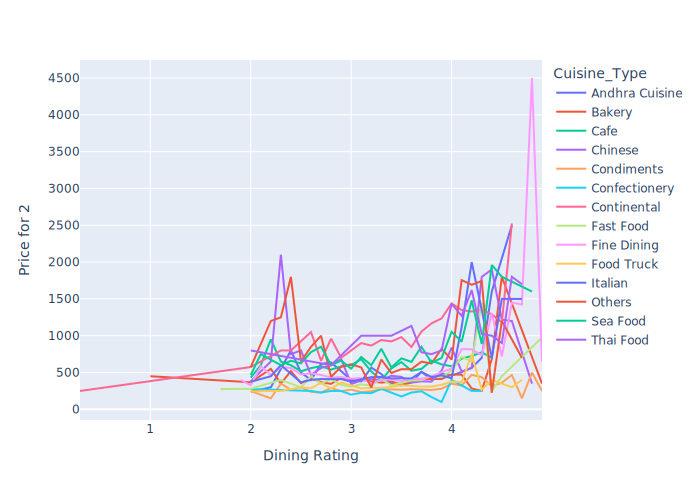

In [42]:
fig = px.line(price_rating_df, y="Price for 2", x="Dining Rating",color='Cuisine_Type') 
fig.show() 

Q9) Is there a relation between Region and Price?

In [43]:
region_price_df = zomato_df.groupby(['Location'])['Price for 2'].mean().reset_index() 
region_price_df 

,Location,Price for 2
0,A Radha Hotel,1900.000000
1,Abhiramapuram,150.000000
2,Adambakkam,308.730159
3,Adyar,519.918699
4,Akkarai,768.181818
...,...,...
123,Vepery,323.611111
124,Vettuvankeni,568.750000
125,Virugambakkam,377.380952
126,Washermenpet,342.622951


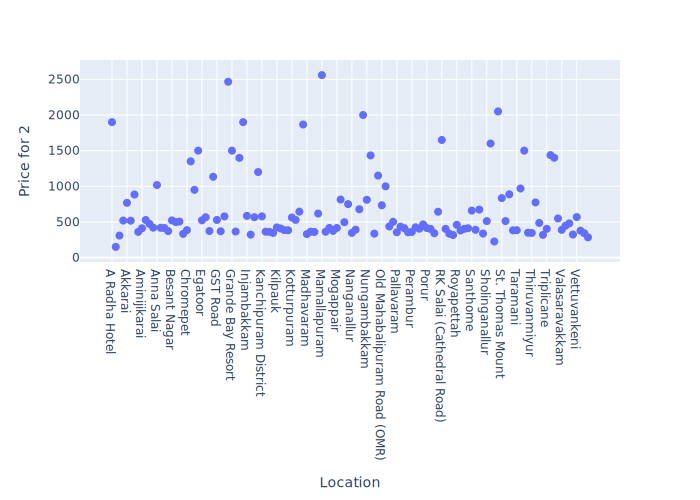

In [44]:
fig = px.scatter(region_price_df, x="Location", y="Price for 2").update_traces(marker_size=8) 
fig.show() 

Q10) Find the list of Affordable Restaurants?

In [45]:
max_price = zomato_df['Price for 2'].max() 
one_fourth_price = max_price/4 
one_fourth_price 

1250.0

In [46]:
 # Finding list of restaurants that have price less than and equal to 1/4th of the max price i.e Finding Cheap Restauran
 
aff_rest_df = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine_Type', 'Location']] 
aff_rest_df = aff_rest_df[aff_rest_df['Price for 2'] <= 1250] 
aff_rest_df.sort_values(by='Price for 2', inplace=True) 
aff_rest_df

,Name of Restaurant,Price for 2,Cuisine_Type,Location
4685,Soda Hub,40.0,Condiments,Navallur
1448,Mamee Soup,60.0,Others,West Mambalam
3993,Nei Idly Sambar,100.0,Fine Dining,Kilpauk
3604,Chennai Coffee,100.0,Condiments,Mylapore
3589,Bakers Basket - The Savera Hotel,100.0,Bakery,RK Salai (Cathedral Road)
...,...,...,...,...
1166,The Roof Top Lounge,1200.0,Continental,Guindy
371,Famous Theory,1200.0,Fine Dining,Sholinganallur
17,Abid's,1200.0,Sea Food,Chetpet
1171,Kapi Multicuisine Restaurant,1200.0,Fine Dining,East Coast Road (ECR)


In [47]:
# Finding the highest rated list of restaurants 
 
highrate_rest_df = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine_Type', 'Location','Dining Rating']] 
highrate_rest_df = highrate_rest_df[highrate_rest_df['Dining Rating'] >= 4.5] 
highrate_rest_df.sort_values(by='Price for 2', inplace=True) 
highrate_rest_df 

,Name of Restaurant,Price for 2,Cuisine_Type,Location,Dining Rating
108,Rayar's Mess,100.0,Fine Dining,Mylapore,4.7
178,Royal Sandwich Shop,150.0,Condiments,Alwarpet,4.7
9541,Bombay Kulfi,200.0,Condiments,Anna Nagar East,4.6
320,Bombay Kulfi,200.0,Condiments,Adyar,4.9
50,Andhikkadai,200.0,Fine Dining,Velachery,4.6
...,...,...,...,...,...
445,Dakshin - Crowne Plaza Chennai Adyar Park,2500.0,Andhra Cuisine,Alwarpet,4.6
395,Southern Spice - Taj Coromandel,3000.0,Fine Dining,Nungambakkam,4.7
229,Vasco's - Hilton Chennai,3400.0,Continental,Guindy,4.6
443,Avartana - ITC Grand Chola,4500.0,Fine Dining,Guindy,4.8


In [48]:
highrate_aff_df = pd.merge(aff_rest_df, highrate_rest_df, how='inner', on=['Name of Restaurant', 'Location']) 
highrate_aff_df = highrate_aff_df[['Name of Restaurant', 'Price for 2_x', 'Cuisine_Type_x', 'Location']] 
highrate_aff_df.rename(columns={'Name of Restaurant':'Name of Restaurant', 'Price for 2_x':'Price for 2', 'Cuisine_Type_x':'Cuisine_Type',  
                                'Location':'Location'},inplace=True) 

In [49]:
highrate_aff_df 

,Name of Restaurant,Price for 2,Cuisine_Type,Location
0,Rayar's Mess,100.0,Fine Dining,Mylapore
1,Royal Sandwich Shop,150.0,Condiments,Alwarpet
2,Royal Sandwich Shop,150.0,Condiments,Alwarpet
3,Royal Sandwich Shop,150.0,Condiments,Alwarpet
4,Bombay Kulfi,200.0,Condiments,Anna Nagar East
5,Andhikkadai,200.0,Fine Dining,Velachery
6,Bombay Kulfi,200.0,Condiments,Adyar
7,Nair Mess,200.0,Fine Dining,Triplicane
8,Eating Circles,250.0,Fine Dining,Alwarpet
9,ID,300.0,Fine Dining,Royapettah


Q10) Find the list of most Reliable Restaurants?

In [50]:
mean_votes = zomato_df['Dining Rating Count'].mean() 
mean_votes 

135.36072444244874

In [51]:
 # Finding list of restaurants that have Votes greater than and equal to  Mean of Vote 
 
mean_rest_df = zomato_df[['Name of Restaurant', 'Price for 2', 'Location', 'Cuisine_Type', 'Dining Rating Count']] 
mean_rest_df = mean_rest_df[mean_rest_df['Dining Rating Count'] > 135] 
mean_rest_df.sort_values(by='Dining Rating Count', inplace=True) 
mean_rest_df

,Name of Restaurant,Price for 2,Location,Cuisine_Type,Dining Rating Count
1306,Nachiyar Authentic Chettinad Restaurant,700.0,Kolathur,Fine Dining,136
9193,Subway,500.0,Gopalapuram,Food Truck,136
9677,Drunken Monkey,400.0,Alwarpet,Condiments,136
9052,A2B - Adyar Ananda Bhavan,600.0,Anna Nagar East,Fine Dining,136
10135,Madrasi Biryani,400.0,Kelambakkam,Fine Dining,136
...,...,...,...,...,...
9026,Copper Kitchen,1000.0,Porur,Sea Food,5073
9030,Paradise Biryani,800.0,Perungudi,Fine Dining,5317
74,Onesta,600.0,Semmancheri,Italian,5407
9233,Barbeque Nation,1600.0,T. Nagar,Continental,5821


In [52]:
reliable_rest_df = pd.merge(mean_rest_df, highrate_aff_df, how='inner', on=['Name of Restaurant', 'Location']) 
reliable_rest_df = reliable_rest_df[['Name of Restaurant', 'Price for 2_x', 'Cuisine_Type_x', 'Location']]
reliable_rest_df.rename(columns={'Name of Restaurant':'Name of Restaurant', 'Price for 2_x':'Price for 2', 'Cuisine_Type_x':'Cuisine_Type',  
                                'Location':'Location'},inplace=True) 

In [53]:
reliable_rest_df

,Name of Restaurant,Price for 2,Cuisine_Type,Location
0,Shmoozie's Hand-Crafted Ice Creams,400.0,Condiments,Egmore
1,Kuuraku,1200.0,Others,Vadapalani
2,Bombay Kulfi,200.0,Condiments,Anna Nagar East
3,New Pattukottai Kamatchi Mess,550.0,Fine Dining,T. Nagar
4,Wok Monk,1200.0,Chinese,Anna Nagar West
5,Blind Ch3mistry,700.0,Continental,Teynampet
6,Writer's Cafe,600.0,Continental,Taramani
7,Bombay Kulfi,200.0,Condiments,Adyar
8,The Sandwich Shop,300.0,Condiments,West Mambalam
9,Fruit Shop On Greams Road,350.0,Condiments,Thousand Lights
